In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
#đọc dữ liệu
data = pd.read_csv('C:\\Users\\Admin/Case_study_CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.shape

(205, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

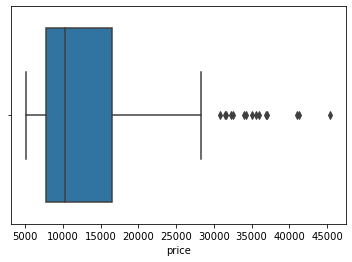

In [7]:
sns.boxplot(data['price'])

In [8]:
data['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [9]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
data['Hãng xe'] = data['CarName'].str.split().str[0]
data['Hãng xe'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
data['Hãng xe'].replace(to_replace='maxda',value='mazda',inplace=True)
data['Hãng xe'].replace(to_replace='Nissan',value='nissan',inplace=True)
data['Hãng xe'].replace(to_replace='porcshce',value='porsche',inplace=True)
data['Hãng xe'].replace(to_replace='toyouta',value='toyota',inplace=True)
data['Hãng xe'].replace(to_replace='vokswagen',value='volkswagen',inplace=True)
data['Hãng xe'].replace(to_replace='vw',value='volkswagen',inplace=True)


In [12]:
data['Hãng xe'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: Hãng xe, dtype: int64

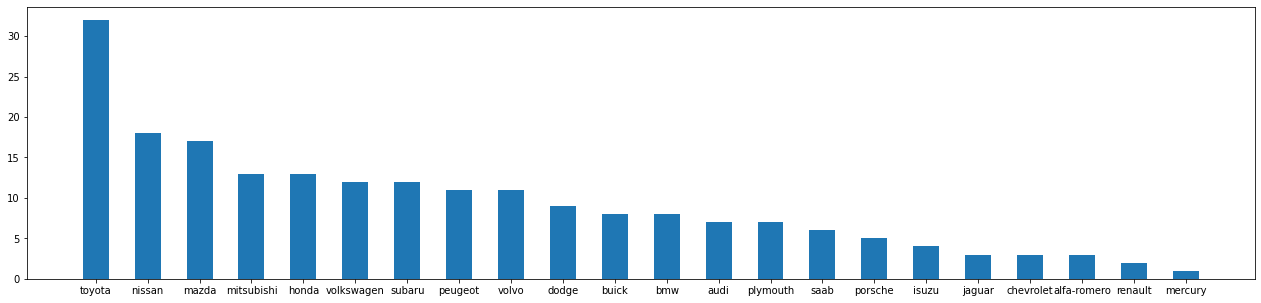

In [13]:

Brand=data['Hãng xe'].value_counts() #hãng xe
fig = plt.figure(figsize = (22, 5))
plt.bar(Brand.index,Brand.values,width=0.5)
Brand


In [14]:
# Thay thế giá trị chữ ở trường doornumber và cylindernumber để tiện chuyển đổi kiểu dữ liệu
data['doornumber'].replace(['two', 'four'], ['2', '4'],inplace = True)
data['doornumber'].unique()

array(['2', '4'], dtype=object)

In [15]:
# Thay thế giá trị chữ ở trường doornumber và cylindernumber để tiện chuyển đổi kiểu dữ liệu
data['cylindernumber'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], 
                             ['4', '6', '5', '3', '12', '2', '8'],inplace = True)
data['cylindernumber'].unique()

array(['4', '6', '5', '3', '12', '2', '8'], dtype=object)

In [16]:
data = data.astype({'doornumber':float, 'curbweight':float
                , 'cylindernumber':float, 'enginesize':float, 'horsepower':float, 'peakrpm':float
                , 'citympg':float, 'highwaympg':float})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    float64
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    float64
 16  enginesize        205 non-null    float64
 1

In [17]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Hãng xe
0,1,3,alfa-romero giulia,gas,std,2.0,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2.0,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2.0,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4.0,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,audi
4,5,2,audi 100ls,gas,std,4.0,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4.0,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,4.0,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,4.0,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,4.0,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0,volvo


In [18]:
data['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [19]:
data['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [20]:
data['doornumber'].unique()

array([2., 4.])

In [21]:
data['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [22]:
data['cylindernumber'].unique()

array([ 4.,  6.,  5.,  3., 12.,  2.,  8.])

In [23]:

data['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [24]:
#sns.pairplot(data)

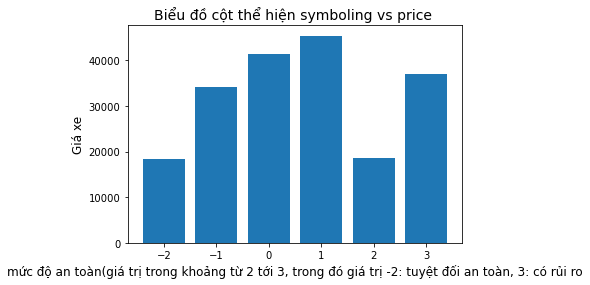

In [25]:
x = data['symboling']
y = data['price']
plt.bar(x,y)
plt.title('Biểu đồ cột thể hiện symboling vs price ', fontsize = 14)
plt.xlabel('mức độ an toàn(giá trị trong khoảng từ 2 tới 3, trong đó giá trị -2: tuyệt đối an toàn, 3: có rủi ro',fontsize =12)
plt.ylabel('Giá xe',fontsize =12)
plt.show()

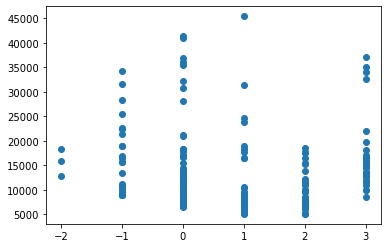

In [26]:
plt.scatter(x=data['symboling'],y=data['price'])
plt.show()

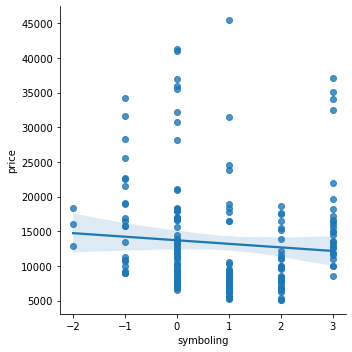

In [27]:
#biểu đồ xu hướng
sns.lmplot(x='symboling',y='price',data=data)
plt.show()

<AxesSubplot:xlabel='symboling', ylabel='count'>

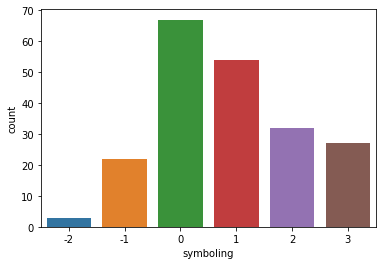

In [28]:
#biểu đồ hiện thị tần suốt
sns.countplot(x='symboling',data=data)

In [29]:
#độ an toàn với giá cả
r,pvalue = pearsonr(data['symboling'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
#không tương quan

r = -0.07997822464270347
pvalue= 0.25431175848636967


<AxesSubplot:xlabel='fueltype', ylabel='count'>

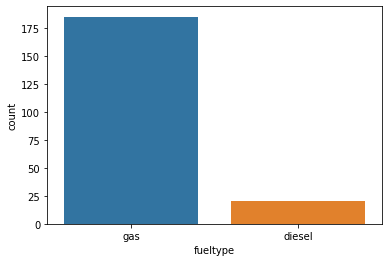

In [30]:
# loại nhiên liệu
sns.countplot(x='fueltype',data=data)

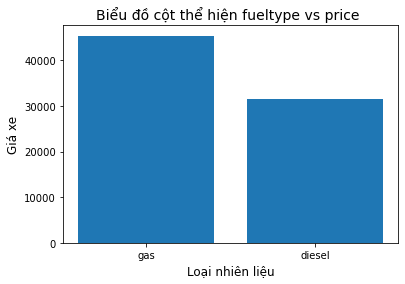

In [31]:
x = data['fueltype']
y = data['price']
plt.bar(x,y)
plt.title('Biểu đồ cột thể hiện fueltype vs price ', fontsize = 14)
plt.xlabel('Loại nhiên liệu',fontsize =12)
plt.ylabel('Giá xe',fontsize =12)
plt.show()

<AxesSubplot:xlabel='aspiration', ylabel='count'>

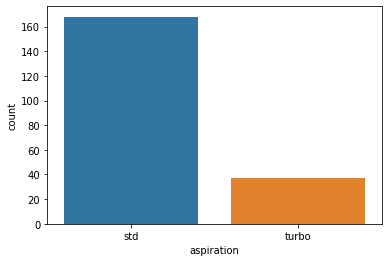

In [32]:
#loại hút

sns.countplot(x='aspiration',data=data)

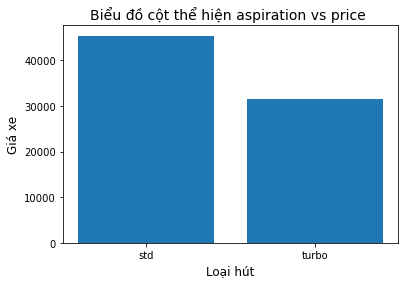

In [33]:
x = data['aspiration']
y = data['price']
plt.bar(x,y)
plt.title('Biểu đồ cột thể hiện aspiration vs price ', fontsize = 14)
plt.xlabel('Loại hút',fontsize =12)
plt.ylabel('Giá xe',fontsize =12)
plt.show()

<AxesSubplot:xlabel='doornumber', ylabel='count'>

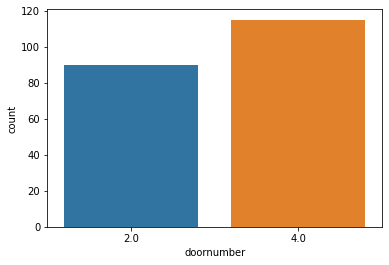

In [34]:
#số cửa
sns.countplot(x='doornumber',data=data)

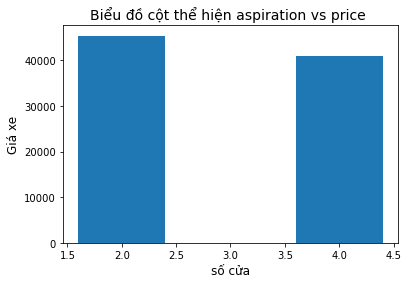

In [35]:
x = data['doornumber']
y = data['price']
plt.bar(x,y)
plt.title('Biểu đồ cột thể hiện aspiration vs price ', fontsize = 14)
plt.xlabel('số cửa',fontsize =12)
plt.ylabel('Giá xe',fontsize =12)
plt.show()

In [36]:
r,pvalue = pearsonr(data['doornumber'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
# Không tương quan

r = 0.031835265845609674
pvalue= 0.6504483953299365


<AxesSubplot:xlabel='carbody', ylabel='count'>

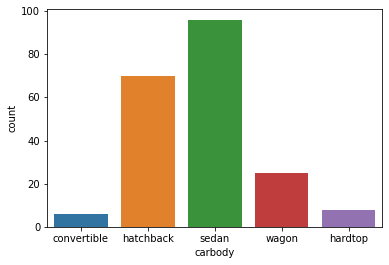

In [37]:
#carbody(Loại thân xe)
sns.countplot(x='carbody',data=data)

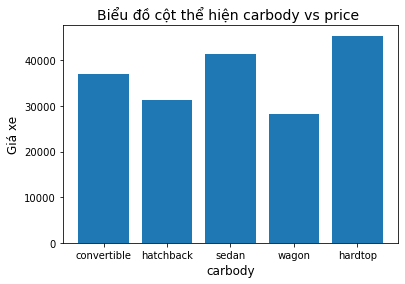

In [38]:
x = data['carbody']
y = data['price']
plt.bar(x,y)
plt.title('Biểu đồ cột thể hiện carbody vs price ', fontsize = 14)
plt.xlabel('carbody',fontsize =12)
plt.ylabel('Giá xe',fontsize =12)
plt.show()

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

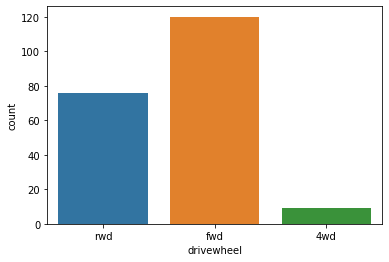

In [39]:
#drivewheel(Loại bánh xe)
sns.countplot(x='drivewheel',data=data)

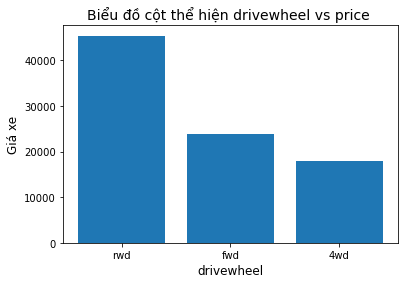

In [40]:
x = data['drivewheel']
y = data['price']
plt.bar(x,y)
plt.title('Biểu đồ cột thể hiện drivewheel vs price ', fontsize = 14)
plt.xlabel('drivewheel',fontsize =12)
plt.ylabel('Giá xe',fontsize =12)
plt.show()

<AxesSubplot:xlabel='enginelocation', ylabel='count'>

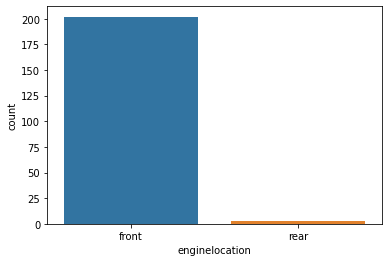

In [41]:
#enginelocation(vị trí động cơ)
sns.countplot(x='enginelocation',data=data)

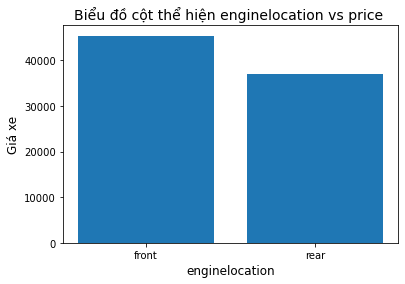

In [42]:
x = data['enginelocation']
y = data['price']
plt.bar(x,y)
plt.title('Biểu đồ cột thể hiện enginelocation vs price ', fontsize = 14)
plt.xlabel('enginelocation',fontsize =12)
plt.ylabel('Giá xe',fontsize =12)
plt.show()

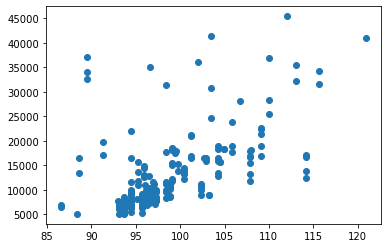

In [43]:
#wheelbase(chiều dài cơ sở)
plt.scatter(x=data['wheelbase'],y=data['price'])
plt.show()

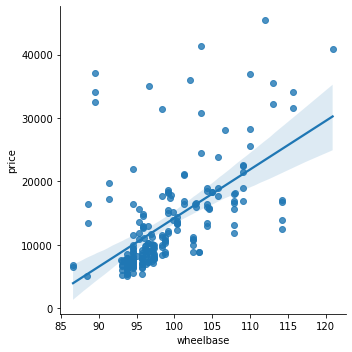

In [44]:
sns.lmplot(x='wheelbase',y='price',data=data)
plt.show()

In [45]:
r,pvalue = pearsonr(data['wheelbase'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
# có tương quan

r = 0.57781559829215
pvalue= 1.1828204863378005e-19


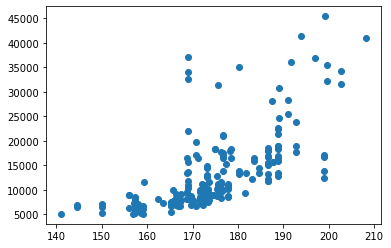

In [46]:
#carlength(Chiều dài xe)
plt.scatter(x=data['carlength'],y=data['price'])
plt.show()

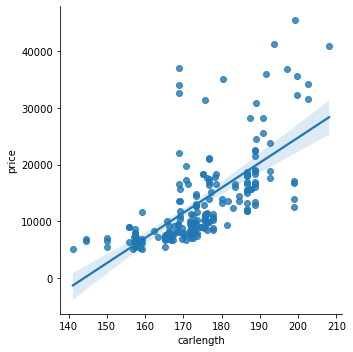

In [47]:
sns.lmplot(x='carlength',y='price',data=data)
plt.show()

In [48]:
r,pvalue = pearsonr(data['carlength'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
#có tương quan

r = 0.6829200156779622
pvalue= 1.6787066240746602e-29


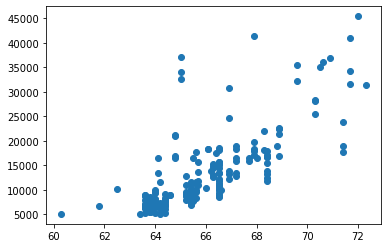

In [49]:
#carwidth( Chiều rộng xe)
plt.scatter(x=data['carwidth'],y=data['price'])
plt.show()

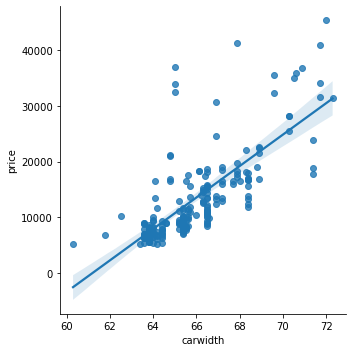

In [50]:
sns.lmplot(x='carwidth',y='price',data=data)
plt.show()

In [51]:
r,pvalue = pearsonr(data['carwidth'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
#có tương quan

r = 0.7593252997415114
pvalue= 9.627437876120389e-40


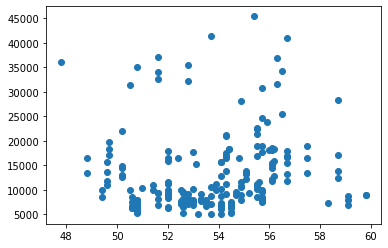

In [52]:
#carheight( Chiều cao xe)
plt.scatter(x=data['carheight'],y=data['price'])
plt.show()

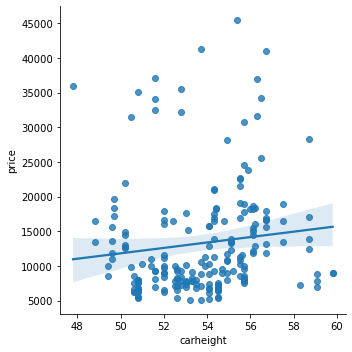

In [53]:
sns.lmplot(x='carheight',y='price',data=data)
plt.show()

In [54]:
r,pvalue = pearsonr(data['carheight'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
#không tương quan

r = 0.11933622657049443
pvalue= 0.08832832352275669


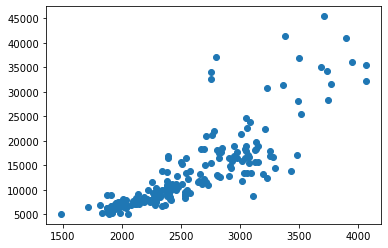

In [55]:
#curbweight(Trọng lượng của xe khi không có người hoặc hành lý)
plt.scatter(x=data['curbweight'],y=data['price'])
plt.show()

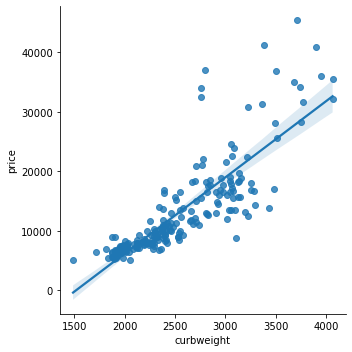

In [56]:
sns.lmplot(x='curbweight',y='price',data=data)
plt.show()

In [57]:
r,pvalue = pearsonr(data['curbweight'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
#có tương quan

r = 0.8353048793372966
pvalue= 1.2144448264032206e-54


In [58]:
#enginetype(Loại động cơ)
data['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [59]:
data['enginetype'].replace(to_replace='ohcv',value='ohv',inplace=True)
data['enginetype'].replace(to_replace='ohcf',value='ohc',inplace=True)
data['enginetype'].replace(to_replace='dohcv',value='dohc',inplace=True)


In [60]:
data['enginetype'].unique()

array(['dohc', 'ohv', 'ohc', 'l', 'rotor'], dtype=object)

<AxesSubplot:xlabel='enginetype', ylabel='count'>

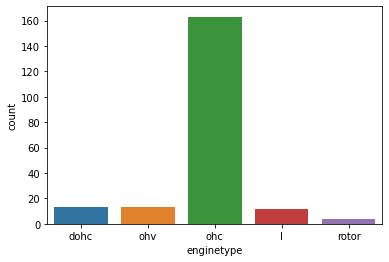

In [61]:
sns.countplot(x='enginetype',data=data)

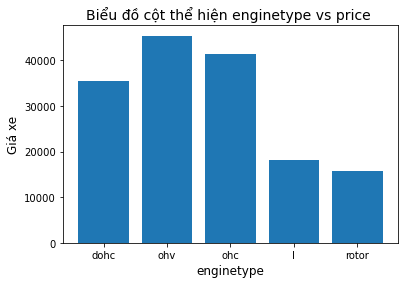

In [62]:
x = data['enginetype']
y = data['price']
plt.bar(x,y)
plt.title('Biểu đồ cột thể hiện enginetype vs price ', fontsize = 14)
plt.xlabel('enginetype',fontsize =12)
plt.ylabel('Giá xe',fontsize =12)
plt.show()

In [63]:
#cylindernumber(Số lượng xi lanh đặt trong xe)
data['cylindernumber'].unique()

array([ 4.,  6.,  5.,  3., 12.,  2.,  8.])

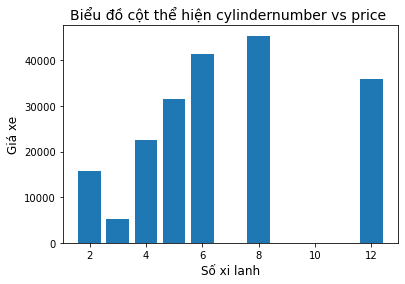

In [64]:
x = data['cylindernumber']
y = data['price']
plt.bar(x,y)
plt.title('Biểu đồ cột thể hiện cylindernumber vs price ', fontsize = 14)
plt.xlabel('Số xi lanh',fontsize =12)
plt.ylabel('Giá xe',fontsize =12)
plt.show()

<AxesSubplot:xlabel='cylindernumber', ylabel='count'>

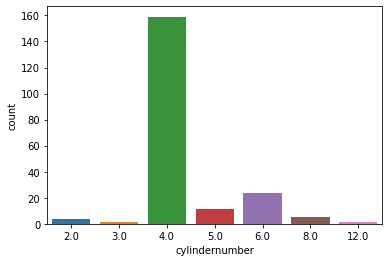

In [65]:
sns.countplot(x='cylindernumber',data=data)

In [66]:
r,pvalue = pearsonr(data['cylindernumber'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
#có tương quan

r = 0.7183049020002833
pvalue= 8.028863372444832e-34


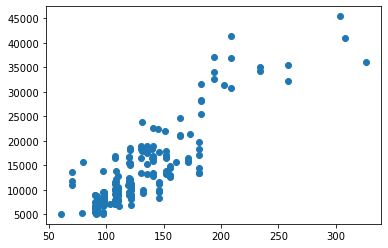

In [67]:
#enginesize(kích thước động cơ)
plt.scatter(x=data['enginesize'],y=data['price'])
plt.show()

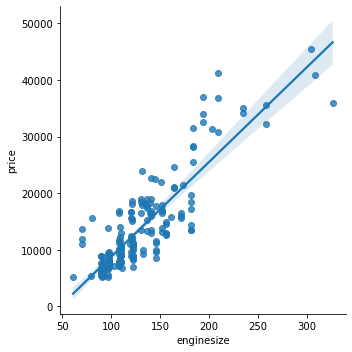

In [68]:
sns.lmplot(x='enginesize',y='price',data=data)
plt.show()

In [69]:
r,pvalue = pearsonr(data['enginesize'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
#có tương quan

r = 0.8741448025245117
pvalue= 1.3547637598648421e-65


In [70]:
#fuelsystem(Hệ thống nhiên liệu của xe ô tô)
data['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

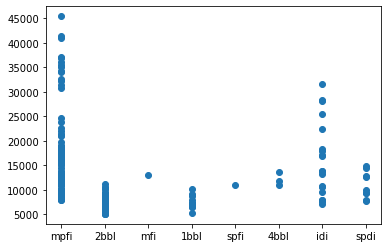

In [71]:
plt.scatter(x=data['fuelsystem'],y=data['price'])
plt.show()

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

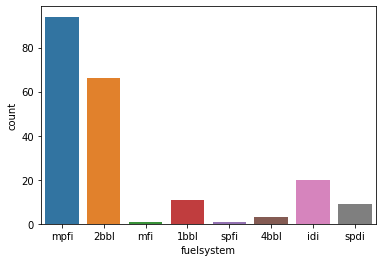

In [72]:
sns.countplot(x='fuelsystem',data=data)

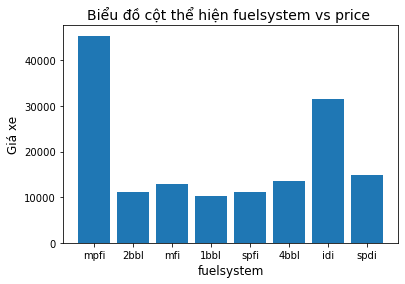

In [73]:
x = data['fuelsystem']
y = data['price']
plt.bar(x,y)
plt.title('Biểu đồ cột thể hiện fuelsystem vs price ', fontsize = 14)
plt.xlabel('fuelsystem',fontsize =12)
plt.ylabel('Giá xe',fontsize =12)
plt.show()

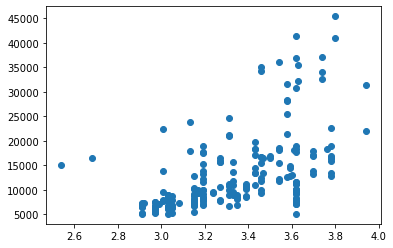

In [74]:
#boreratio(tỉ số hành trình)
plt.scatter(x=data['boreratio'],y=data['price'])
plt.show()

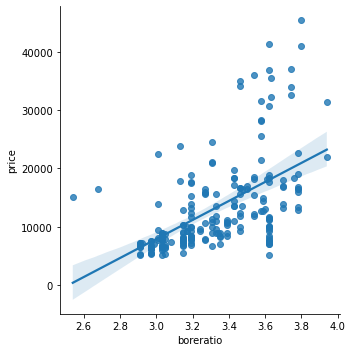

In [75]:
sns.lmplot(x='boreratio',y='price',data=data)
plt.show()

In [76]:
r,pvalue = pearsonr(data['boreratio'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
# có tương quan

r = 0.5531732367984437
pvalue= 7.907922278249421e-18


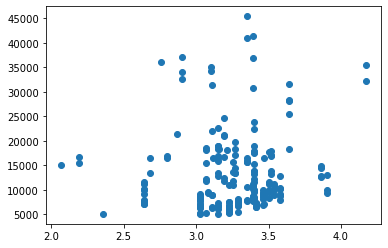

In [77]:
#stroke(số kỳ hoăc kích thước bên trong động cơ)
plt.scatter(x=data['stroke'],y=data['price'])
plt.show()

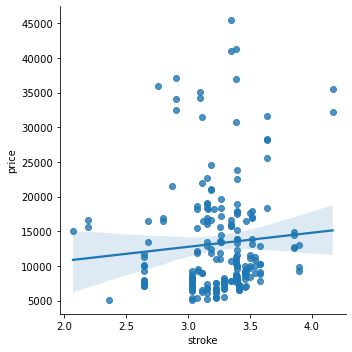

In [78]:
sns.lmplot(x='stroke',y='price',data=data)
plt.show()

In [79]:
r,pvalue = pearsonr(data['stroke'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
#không tương quan

r = 0.079443083881931
pvalue= 0.2575137159091036


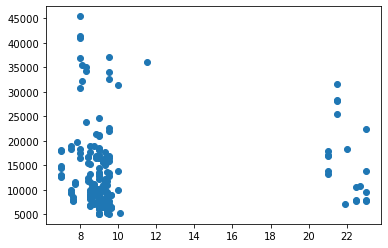

In [80]:
#compressionratio(tỉ số nén)
plt.scatter(x=data['compressionratio'],y=data['price'])
plt.show()

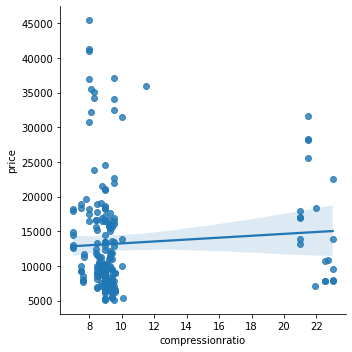

In [81]:
sns.lmplot(x='compressionratio',y='price',data=data)
plt.show()

In [82]:
r,pvalue = pearsonr(data['compressionratio'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
#không tương quan

r = 0.06798350579944265
pvalue= 0.3327723612238307


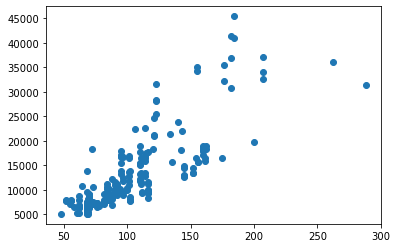

In [83]:
#horsepower(Mã lực)
plt.scatter(x=data['horsepower'],y=data['price'])
plt.show()

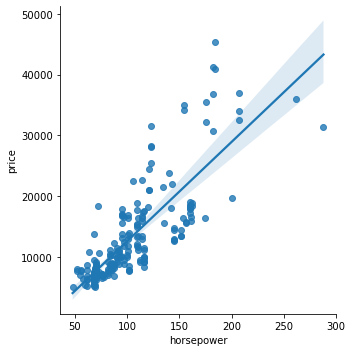

In [84]:
sns.lmplot(x='horsepower',y='price',data=data)
plt.show()

In [85]:
r,pvalue = pearsonr(data['horsepower'],data['price'])
print('r =',r)
print('pvalue=',pvalue)

r = 0.8081388225362218
pvalue= 1.483436573293965e-48


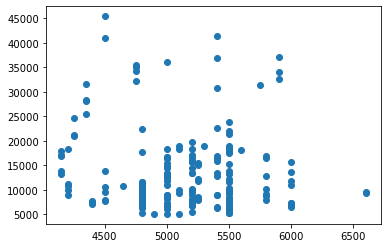

In [86]:
#peakrpm(Tốc độ động cơ cao nhất)
plt.scatter(x=data['peakrpm'],y=data['price'])
plt.show()

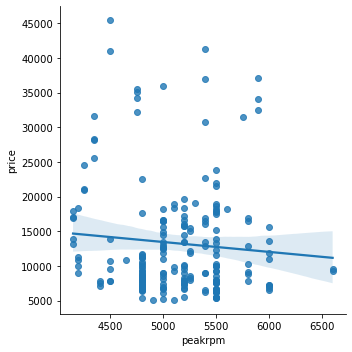

In [87]:
sns.lmplot(x='peakrpm',y='price',data=data)
plt.show()

In [88]:
r,pvalue = pearsonr(data['peakrpm'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
#không tương quan

r = -0.08526715027785689
pvalue= 0.22414123444667824


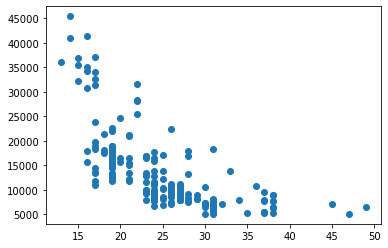

In [89]:
#citympg(số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố)
plt.scatter(x=data['citympg'],y=data['price'])
plt.show()

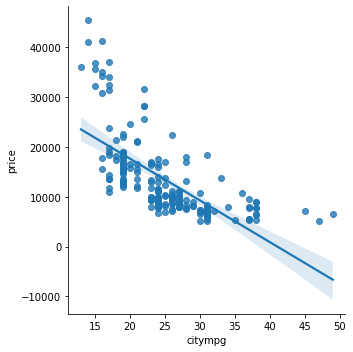

In [90]:
sns.lmplot(x='citympg',y='price',data=data)
plt.show()

In [91]:
r,pvalue = pearsonr(data['citympg'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
#tương quan nghịch

r = -0.6857513360270397
pvalue= 7.978684249663976e-30


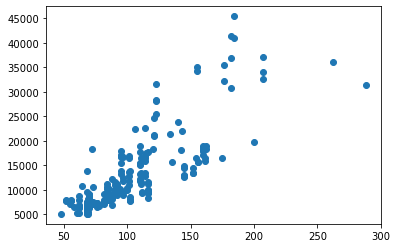

In [92]:
#highwaympg(số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc)
plt.scatter(x=data['horsepower'],y=data['price'])
plt.show()

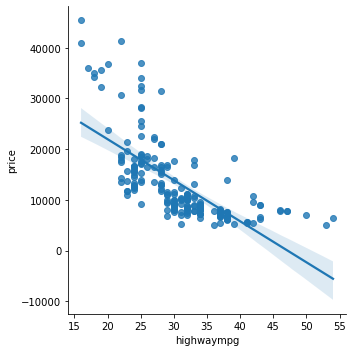

In [93]:
sns.lmplot(x='highwaympg',y='price',data=data)
plt.show()

In [94]:
r,pvalue = pearsonr(data['highwaympg'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
#tương quan nghịch

r = -0.6975990916465565
pvalue= 3.230681380364601e-31


In [95]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Hãng xe
0,1,3,alfa-romero giulia,gas,std,2.0,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2.0,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2.0,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4.0,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,audi
4,5,2,audi 100ls,gas,std,4.0,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4.0,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,4.0,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,4.0,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,4.0,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0,volvo


In [96]:
data_1 = data.iloc[:,1:].select_dtypes(['int','float'])

In [97]:
data_1.corr().price

symboling          -0.079978
doornumber          0.031835
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
cylindernumber      0.718305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

#Nhận xét các thuộc tính gây ảnh hưởng tới giá
Những thuộc tính như chiều dài cơ sở, chiều dài xe, chiều rộng xe, trọng lượng của xe không có người hoặc hành lý có thể ảnh hưởng tới tính khả dụng và tính tiện nghi của xe. Số lượng xi lanh, kích thước động cơ, tỉ số hành trình, mã lực cũng có thể ảnh hưởng đến hiệu suất và mức tiêu hao nhiên liệu của xe.

Số dặm đi được cho 1 galon nhiên liệu trong thành phố và số dặm đi được cho 1 galon nhiên liệu trên đường cao tốc cũng có thể ảnh hưởng đến chi phí sử dụng và tính tiết kiệm của xe.

Tất cả các thuộc tính trên có thể ảnh hưởng đến giá ô tô. Nếu các thuộc tính này có mối tương quan mạnh với giá ô tô thì các thuộc tính này có thể được sử dụng để dự đoán giá ô tô.

In [98]:
corr = data_1.corr()

<AxesSubplot:>

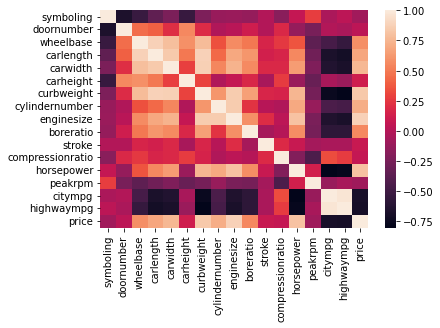

In [99]:
sns.heatmap(corr)

In [100]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   doornumber        205 non-null    float64
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    float64
 7   cylindernumber    205 non-null    float64
 8   enginesize        205 non-null    float64
 9   boreratio         205 non-null    float64
 10  stroke            205 non-null    float64
 11  compressionratio  205 non-null    float64
 12  horsepower        205 non-null    float64
 13  peakrpm           205 non-null    float64
 14  citympg           205 non-null    float64
 15  highwaympg        205 non-null    float64
 16  price             205 non-null    float64
dt

In [101]:
data_o = data.iloc[:,1:].select_dtypes(['object'])
data_o

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,Hãng xe
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohv,mpfi,alfa-romero
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi,audi
...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,sedan,rwd,front,ohc,mpfi,volvo
201,volvo 144ea,gas,turbo,sedan,rwd,front,ohc,mpfi,volvo
202,volvo 244dl,gas,std,sedan,rwd,front,ohv,mpfi,volvo
203,volvo 246,diesel,turbo,sedan,rwd,front,ohc,idi,volvo


In [102]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Hãng xe
0,1,3,alfa-romero giulia,gas,std,2.0,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2.0,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2.0,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4.0,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,audi
4,5,2,audi 100ls,gas,std,4.0,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4.0,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,4.0,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,4.0,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,4.0,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0,volvo


In [103]:
data_num = data.iloc[:,1:].select_dtypes(['int','float'])
data_num.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,2.0,94.5,171.2,65.5,52.4,2823.0,6.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2,4.0,99.8,176.6,66.2,54.3,2337.0,4.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2,4.0,99.4,176.6,66.4,54.3,2824.0,5.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [104]:
data_o = data.iloc[:,1:].select_dtypes(['object'])
data_o

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,Hãng xe
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohv,mpfi,alfa-romero
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi,audi
...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,sedan,rwd,front,ohc,mpfi,volvo
201,volvo 144ea,gas,turbo,sedan,rwd,front,ohc,mpfi,volvo
202,volvo 244dl,gas,std,sedan,rwd,front,ohv,mpfi,volvo
203,volvo 246,diesel,turbo,sedan,rwd,front,ohc,idi,volvo


In [105]:
#mã hóa dữ liệu
#  label encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [106]:

for i in data_o.columns:
    data_o[f'en_{i}'] = lb.fit_transform(data_o[i])
data_o.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,Hãng xe,en_CarName,en_fueltype,en_aspiration,en_carbody,en_drivewheel,en_enginelocation,en_enginetype,en_fuelsystem,en_Hãng xe
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero,2,1,0,0,2,0,0,5,0
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero,3,1,0,0,2,0,0,5,0
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohv,mpfi,alfa-romero,1,1,0,2,2,0,3,5,0
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi,audi,4,1,0,3,1,0,2,5,1
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi,audi,5,1,0,3,0,0,2,5,1


In [107]:
data['price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [108]:
data_o_en = data_o.iloc[:,9:]

data_o_en.head()

,en_CarName,en_fueltype,en_aspiration,en_carbody,en_drivewheel,en_enginelocation,en_enginetype,en_fuelsystem,en_Hãng xe
0,2,1,0,0,2,0,0,5,0
1,3,1,0,0,2,0,0,5,0
2,1,1,0,2,2,0,3,5,0
3,4,1,0,3,1,0,2,5,1
4,5,1,0,3,0,0,2,5,1


In [109]:
#Carname vs price
r,pvalue = pearsonr(data_o_en['en_CarName'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
# có tương quan

r = -0.23143912104581835
pvalue= 0.0008411370383540687


In [110]:
r,pvalue = pearsonr(data_o_en['en_fueltype'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
# không tương quan

r = -0.105679482359739
pvalue= 0.13153563336538915


In [111]:
r,pvalue = pearsonr(data_o_en['en_aspiration'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
# có tương quan

r = 0.1779262246309782
pvalue= 0.010700300833183903


In [112]:
r,pvalue = pearsonr(data_o_en['en_carbody'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
# không tương quan

r = -0.08397567917235164
pvalue= 0.23126274882667838


In [113]:
r,pvalue = pearsonr(data_o_en['en_drivewheel'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
# có tương quan

r = 0.5779915312861978
pvalue= 1.1463889514554485e-19


In [114]:
r,pvalue = pearsonr(data_o_en['en_enginelocation'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
# có tương quan

r = 0.32497330108095607
pvalue= 1.9930196390574695e-06


In [115]:
r,pvalue = pearsonr(data_o_en['en_enginetype'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
# không tương quan

r = -0.015552073007541772
pvalue= 0.8248404714263751


In [116]:
r,pvalue = pearsonr(data_o_en['en_fuelsystem'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
# có tương quan

r = 0.5268229602111609
pvalue= 4.89885075348854e-16


In [117]:
r,pvalue = pearsonr(data_o_en['en_Hãng xe'],data['price'])
print('r =',r)
print('pvalue=',pvalue)
# có tương quan

r = -0.2622343627602961
pvalue= 0.0001456602322818889


In [118]:
num_feature_selection = data[['wheelbase','carlength','carwidth','curbweight','cylindernumber','enginesize','boreratio','horsepower','citympg','price']]
num_feature_selection.head()


,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,price
0,88.6,168.8,64.1,2548.0,4.0,130.0,3.47,111.0,21.0,13495.0
1,88.6,168.8,64.1,2548.0,4.0,130.0,3.47,111.0,21.0,16500.0
2,94.5,171.2,65.5,2823.0,6.0,152.0,2.68,154.0,19.0,16500.0
3,99.8,176.6,66.2,2337.0,4.0,109.0,3.19,102.0,24.0,13950.0
4,99.4,176.6,66.4,2824.0,5.0,136.0,3.19,115.0,18.0,17450.0


In [119]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()#bằng vs z-score
num_feature_selection_new = s_scaler.fit_transform(num_feature_selection)#trả vể mảng
num_feature_selection_new
num_feature_selection_new = pd.DataFrame(num_feature_selection_new, columns=['wheelbase','carlength','carwidth','curbweight','cylindernumber','enginesize','boreratio','horsepower','citympg','price'])#biến đổi thành dataframe
num_feature_selection_new.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,price
0,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,0.027391
1,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,0.404461
2,-0.708596,-0.231513,-0.190566,0.514882,1.502032,0.604046,-2.404880,1.264536,-0.953012,0.404461
3,0.173698,0.207256,0.136542,-0.420797,-0.352887,-0.431076,-0.517266,-0.053668,-0.186865,0.084485
4,0.107110,0.207256,0.230001,0.516807,0.574572,0.218885,-0.517266,0.275883,-1.106241,0.523668


In [120]:
num_feature_selection_new['price']

0      0.027391
1      0.404461
2      0.404461
3      0.084485
4      0.523668
         ...   
200    0.447752
201    0.723810
202    1.029983
203    1.153582
204    1.173031
Name: price, Length: 205, dtype: float64

In [121]:
num_feature_selection_new['price'] = num_feature_selection_new['price']

In [122]:
num_feature_selection_new

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,price
0,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,0.027391
1,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,0.404461
2,-0.708596,-0.231513,-0.190566,0.514882,1.502032,0.604046,-2.404880,1.264536,-0.953012,0.404461
3,0.173698,0.207256,0.136542,-0.420797,-0.352887,-0.431076,-0.517266,-0.053668,-0.186865,0.084485
4,0.107110,0.207256,0.230001,0.516807,0.574572,0.218885,-0.517266,0.275883,-1.106241,0.523668
...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.763241,-0.352887,0.339248,1.666445,0.250533,-0.340094,0.447752
201,1.721873,1.198549,1.351515,0.949992,-0.352887,0.339248,1.666445,1.416637,-0.953012,0.723810
202,1.721873,1.198549,1.398245,0.878757,1.502032,1.109571,0.926204,0.757535,-1.106241,1.029983
203,1.721873,1.198549,1.398245,1.273437,1.502032,0.435538,-1.183483,0.047732,0.119594,1.153582


In [123]:
data_final = num_feature_selection_new.merge(data_o_en, left_index=True, right_index=True)
data_final

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,price,en_CarName,en_fueltype,en_aspiration,en_carbody,en_drivewheel,en_enginelocation,en_enginetype,en_fuelsystem,en_Hãng xe
0,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,0.027391,2,1,0,0,2,0,0,5,0
1,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,0.404461,3,1,0,0,2,0,0,5,0
2,-0.708596,-0.231513,-0.190566,0.514882,1.502032,0.604046,-2.404880,1.264536,-0.953012,0.404461,1,1,0,2,2,0,3,5,0
3,0.173698,0.207256,0.136542,-0.420797,-0.352887,-0.431076,-0.517266,-0.053668,-0.186865,0.084485,4,1,0,3,1,0,2,5,1
4,0.107110,0.207256,0.230001,0.516807,0.574572,0.218885,-0.517266,0.275883,-1.106241,0.523668,5,1,0,3,0,0,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.763241,-0.352887,0.339248,1.666445,0.250533,-0.340094,0.447752,139,1,0,3,2,0,2,5,21
201,1.721873,1.198549,1.351515,0.949992,-0.352887,0.339248,1.666445,1.416637,-0.953012,0.723810,138,1,1,3,2,0,2,5,21
202,1.721873,1.198549,1.398245,0.878757,1.502032,1.109571,0.926204,0.757535,-1.106241,1.029983,140,1,0,3,2,0,3,5,21
203,1.721873,1.198549,1.398245,1.273437,1.502032,0.435538,-1.183483,0.047732,0.119594,1.153582,142,0,1,3,2,0,2,3,21


In [124]:
data_final.drop('price',axis=1,inplace=True)
data_final.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,en_CarName,en_fueltype,en_aspiration,en_carbody,en_drivewheel,en_enginelocation,en_enginetype,en_fuelsystem,en_Hãng xe
0,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,2,1,0,0,2,0,0,5,0
1,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,3,1,0,0,2,0,0,5,0
2,-0.708596,-0.231513,-0.190566,0.514882,1.502032,0.604046,-2.404880,1.264536,-0.953012,1,1,0,2,2,0,3,5,0
3,0.173698,0.207256,0.136542,-0.420797,-0.352887,-0.431076,-0.517266,-0.053668,-0.186865,4,1,0,3,1,0,2,5,1
4,0.107110,0.207256,0.230001,0.516807,0.574572,0.218885,-0.517266,0.275883,-1.106241,5,1,0,3,0,0,2,5,1


In [125]:
data_final['price'] = num_feature_selection_new['price']
data_final.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,en_CarName,en_fueltype,en_aspiration,en_carbody,en_drivewheel,en_enginelocation,en_enginetype,en_fuelsystem,en_Hãng xe,price
0,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,2,1,0,0,2,0,0,5,0,0.027391
1,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,3,1,0,0,2,0,0,5,0,0.404461
2,-0.708596,-0.231513,-0.190566,0.514882,1.502032,0.604046,-2.404880,1.264536,-0.953012,1,1,0,2,2,0,3,5,0,0.404461
3,0.173698,0.207256,0.136542,-0.420797,-0.352887,-0.431076,-0.517266,-0.053668,-0.186865,4,1,0,3,1,0,2,5,1,0.084485
4,0.107110,0.207256,0.230001,0.516807,0.574572,0.218885,-0.517266,0.275883,-1.106241,5,1,0,3,0,0,2,5,1,0.523668


In [126]:
data_final = data_final.drop(columns=['en_CarName', 'en_fueltype', 'en_enginelocation','en_enginetype','en_fuelsystem'])

In [127]:
data_final.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,en_aspiration,en_carbody,en_drivewheel,en_Hãng xe,price
0,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,0,0,2,0,0.027391
1,-1.690772,-0.426521,-0.844782,-0.014566,-0.352887,0.074449,0.519071,0.174483,-0.646553,0,0,2,0,0.404461
2,-0.708596,-0.231513,-0.190566,0.514882,1.502032,0.604046,-2.404880,1.264536,-0.953012,0,2,2,0,0.404461
3,0.173698,0.207256,0.136542,-0.420797,-0.352887,-0.431076,-0.517266,-0.053668,-0.186865,0,3,1,1,0.084485
4,0.107110,0.207256,0.230001,0.516807,0.574572,0.218885,-0.517266,0.275883,-1.106241,0,3,0,1,0.523668


In [128]:
X_train = data_final.iloc[:164,:-1].values.reshape(-1,13)
y_train = data_final.iloc[:164,-1]

In [129]:
X_test = data_final.iloc[164:,:-1].values.reshape(-1,13)
y_test = data_final.iloc[164:,-1]


In [130]:
m_model = LinearRegression()
m_model.fit(X_train,y_train.ravel())

LinearRegression()

In [131]:
print(f'The linear model is: \n Y = {m_model.intercept_} +\
    {m_model.coef_[0]}*X1 + {m_model.coef_[1]}*X2 +\
    {m_model.coef_[2]}*X3+ {m_model.coef_[3]}*X4 +\
    {m_model.coef_[4]}*X5+ {m_model.coef_[5]}*X6 +\
    {m_model.coef_[6]}*X7+ {m_model.coef_[7]}*X8 +\
    {m_model.coef_[8]}*X9')

The linear model is: 
 Y = 0.5500706328316703 +    0.1395549253410771*X1 + 0.084540208721416*X2 +    0.0007323190934424785*X3+ 0.17602498494743407*X4 +    -0.0007326454425187818*X5+ 0.2633676672346524*X6 +    0.047448278570222345*X7+ 0.41714922535638144*X8 +    0.10574082833390143*X9


In [132]:
m_model.score(X_train,y_train.ravel())

0.8805565456341209

In [133]:
y_predict = m_model.predict(X_test)


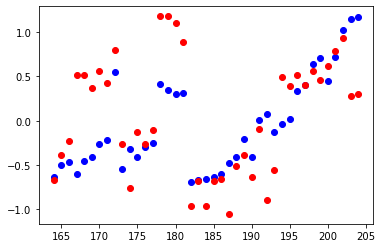

In [134]:
plt.scatter(y_test.index,y_test,color = 'blue')
plt.scatter(y_test.index,y_predict,color = 'red')
plt.show()

In [135]:
import statsmodels.api as sm
X = data_final.iloc[:,:-1].values.reshape(-1,13)
y = data_final.iloc[:,-1]
exog = sm.add_constant(X)
estimator = sm.OLS(y,exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     82.76
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           4.51e-71
Time:                        20:17:36   Log-Likelihood:                -96.954
No. Observations:                 205   AIC:                             221.9
Df Residuals:                     191   BIC:                             268.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4173      0.201      2.076      0.0

In [136]:
#tổng bình phương sai số trung bình
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2557551643770958


In [137]:
#chọn dl có độ tương quan >0.7

data_final = data_final.drop(columns=['wheelbase', 'carlength', 'boreratio','citympg'])
data_final.head()

,carwidth,curbweight,cylindernumber,enginesize,horsepower,en_aspiration,en_carbody,en_drivewheel,en_Hãng xe,price
0,-0.844782,-0.014566,-0.352887,0.074449,0.174483,0,0,2,0,0.027391
1,-0.844782,-0.014566,-0.352887,0.074449,0.174483,0,0,2,0,0.404461
2,-0.190566,0.514882,1.502032,0.604046,1.264536,0,2,2,0,0.404461
3,0.136542,-0.420797,-0.352887,-0.431076,-0.053668,0,3,1,1,0.084485
4,0.230001,0.516807,0.574572,0.218885,0.275883,0,3,0,1,0.523668


In [138]:
X_train = data_final.iloc[:164,:-1].values.reshape(-1,9)
y_train = data_final.iloc[:164,-1]

In [139]:
X_test = data_final.iloc[164:,:-1].values.reshape(-1,9)
y_test = data_final.iloc[164:,-1]

In [140]:
m_model = LinearRegression()
m_model.fit(X_train,y_train.ravel())

LinearRegression()

In [141]:
m_model.score(X_train,y_train.ravel())

0.874017973424177

In [142]:
import statsmodels.api as sm
X = data_final.iloc[:,:-1].values.reshape(-1,9)
y = data_final.iloc[:,-1]
exog = sm.add_constant(X)
estimator = sm.OLS(y,exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     119.3
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           2.40e-74
Time:                        20:17:36   Log-Likelihood:                -98.923
No. Observations:                 205   AIC:                             217.8
Df Residuals:                     195   BIC:                             251.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1942      0.163      1.192      0.2

In [143]:
#tổng bình phương sai số trung bình
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2557551643770958


R_square là một số đo đánh giá mức độ tốt của mô hình hồi quy. 
Nó xác định mức độ phần dự đoán của mô hình được giải thích bởi dữ liệu. 
R_square có giá trị từ 0 đến 1, giá trị cao hơn càng tốt. 
Trong khi đó Mean Squared Error (MSE) là một chỉ số đánh giá 
sự sai lệch giữa dự đoán của mô hình và giá trị thực tế. 
Giá trị MSE càng nhỏ, chất lượng của mô hình càng tốt.

Nhận xét chung, chúng ta cần đánh giá cả hai R_square và MSE để đánh giá chất lượng của mô hình. 
Một mô hình có R_square cao nhưng MSE lớn có thể cho thấy rằng mô hình có thể overfitting, 
còn một mô hình có R_square thấp và MSE nhỏ có thể cho thấy mô hình có thể underfitting. 
Chúng ta cần tìm cân bằng giữa hai chỉ số này để đánh giá chất lượng mô hình tốt nhất.